In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

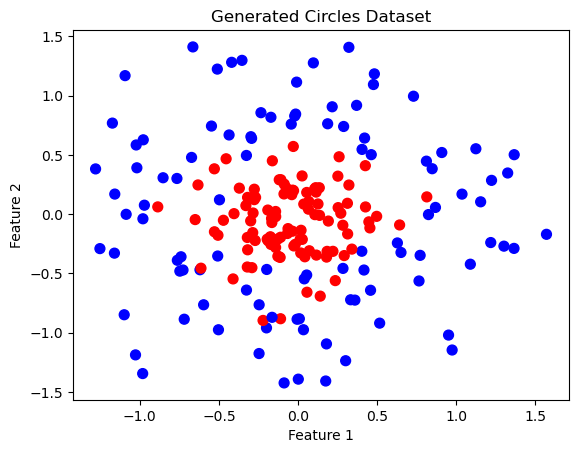

In [85]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate circular data
X, y = make_circles(n_samples=200, factor=0.1, noise=0.3)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Circles Dataset")
plt.show()


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
classifier = SVC(kernel="linear",degree=6)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

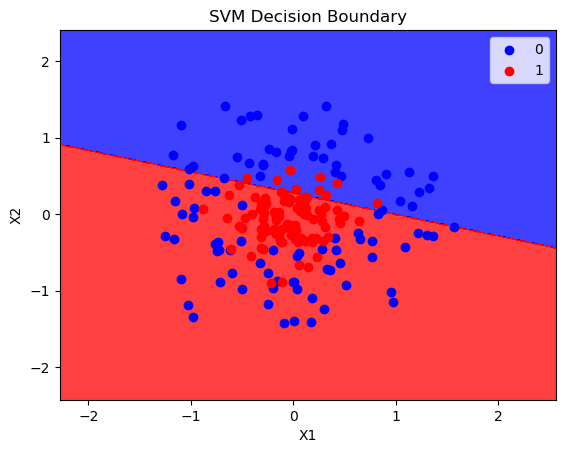

In [88]:
plot_decision_boundary(X, y, classifier)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define color map with explicit RGB colors
zero_one_colourmap = ListedColormap(['blue', 'red'])

# Function to plot decision boundary
def plot_decision_boundary(X, y, clf):
    X1, X2 = np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
    )

    plt.contourf(X1, X2, clf.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
                 alpha=0.75, cmap=zero_one_colourmap)
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1], c=[zero_one_colourmap.colors[i]], label=j)

    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()


<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

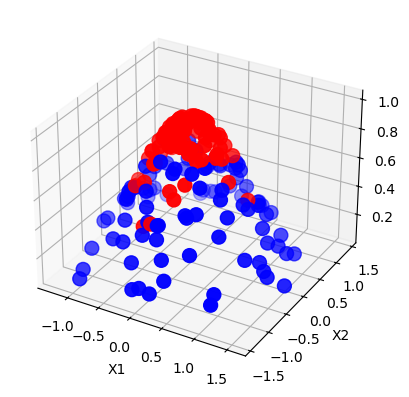

In [89]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
plot_3d_plot(X,y)

In [90]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred)

0.85

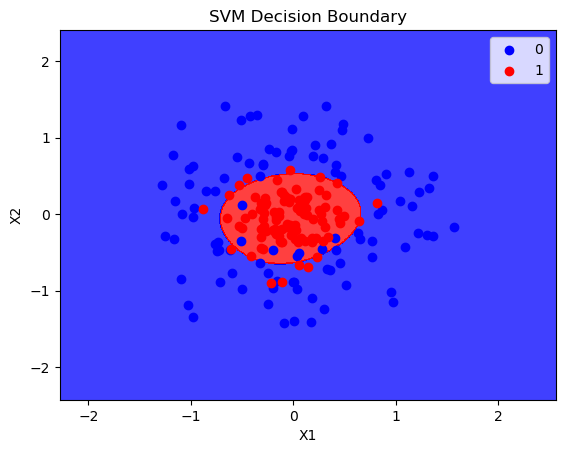

In [92]:
plot_decision_boundary(X, y, rbf_classifier)

In [104]:
poly_classifier = SVC(kernel="poly",degree=4)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [105]:
accuracy_score(y_test, y_pred)

0.9

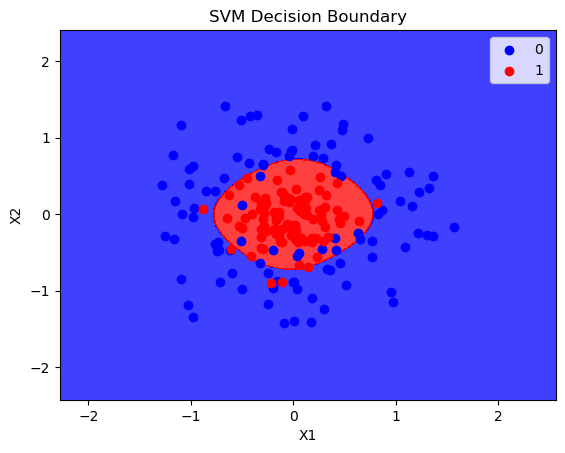

In [106]:
plot_decision_boundary(X, y, poly_classifier)